In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



## **Creating Data in DataFrame**

In [22]:
# My existing data in a DataFrame
data = {
    "Fiber Optic Cables": [
        "Product 1",
        "Product 2",
        "Product 3",
        "Product 4",
        "Product 5",
        "Product 6",
        "Product 7",
        "Product 8"
    ],
    "Fs.com": [3.8, 243, 0.73, 14, 1.75, 25.08, 27, 4.8],
    "Naddod": [3.5, 174.3, None, None, None, None, None, None],
    "Fibermart": [2.68, 120, 0.23, 11, 1.03, 25.22, 25.22, 4.6],
    "CableWholesale": [6.68, None, None, None, None, None, None, None],
    "Fiberinthebox": [3.24, None, 0.68, None, None, None, None, 4.28],
    "Cables.com": [None, None, None, None, 2.1, 72, 73.5, None]
}


In [23]:
df = pd.DataFrame(data)


In [24]:
print (df)

  Fiber Optic Cables  Fs.com  Naddod  Fibermart  CableWholesale  \
0          Product 1    3.80     3.5       2.68            6.68   
1          Product 2  243.00   174.3     120.00             NaN   
2          Product 3    0.73     NaN       0.23             NaN   
3          Product 4   14.00     NaN      11.00             NaN   
4          Product 5    1.75     NaN       1.03             NaN   
5          Product 6   25.08     NaN      25.22             NaN   
6          Product 7   27.00     NaN      25.22             NaN   
7          Product 8    4.80     NaN       4.60             NaN   

   Fiberinthebox  Cables.com  
0           3.24         NaN  
1            NaN         NaN  
2           0.68         NaN  
3            NaN         NaN  
4            NaN         2.1  
5            NaN        72.0  
6            NaN        73.5  
7           4.28         NaN  


# **Find & Visualize Gaps in Prices**

In [25]:
# Function to find gaps in prices
def find_price_gaps(prices):
    sorted_prices = prices.dropna().sort_values().values
    gaps = np.diff(sorted_prices)
    return gaps, sorted_prices


Gaps for Product 1: [0.56 0.2599999999999998 0.2999999999999998 2.88]


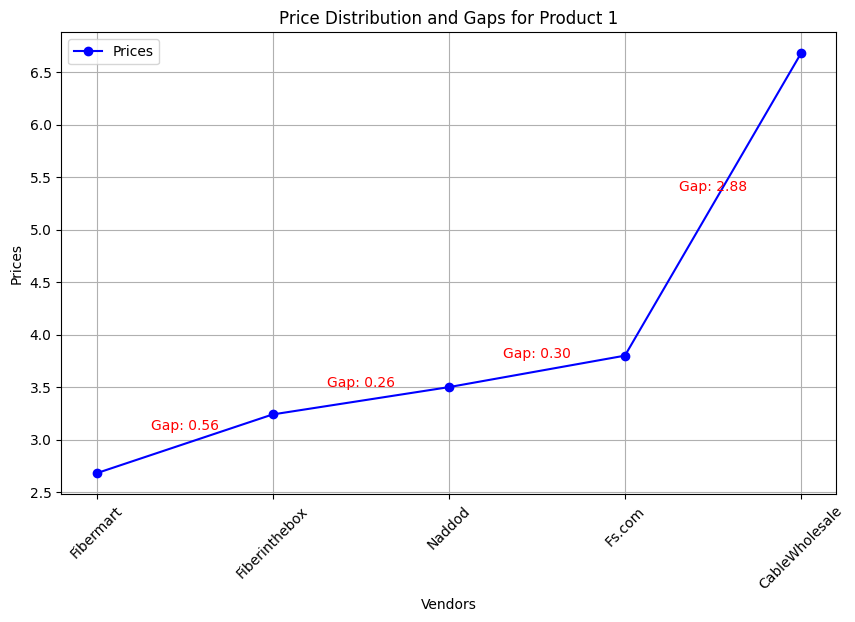

Gaps for Product 2: [54.30000000000001 68.69999999999999]


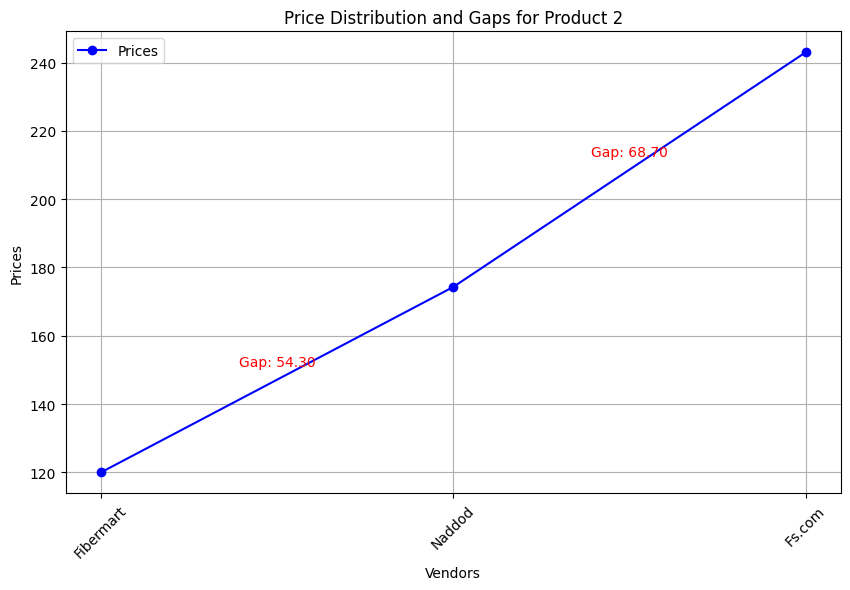

Gaps for Product 3: [0.45000000000000007 0.04999999999999993]


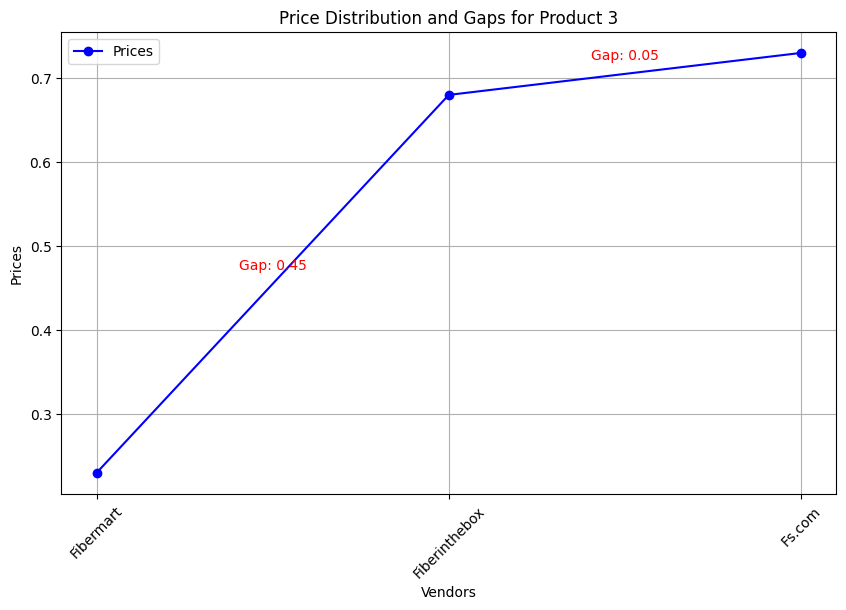

Gaps for Product 4: [3.0]


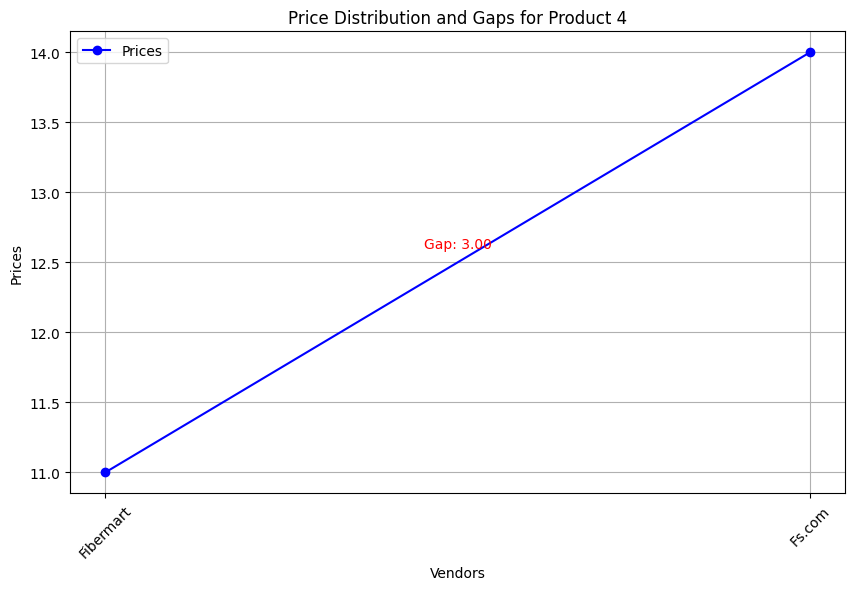

Gaps for Product 5: [0.72 0.3500000000000001]


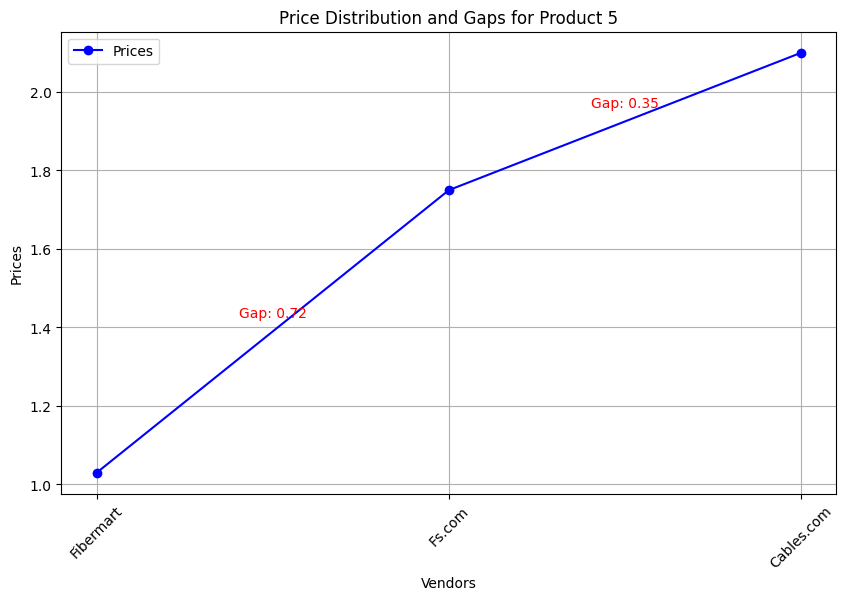

Gaps for Product 6: [0.14000000000000057 46.78]


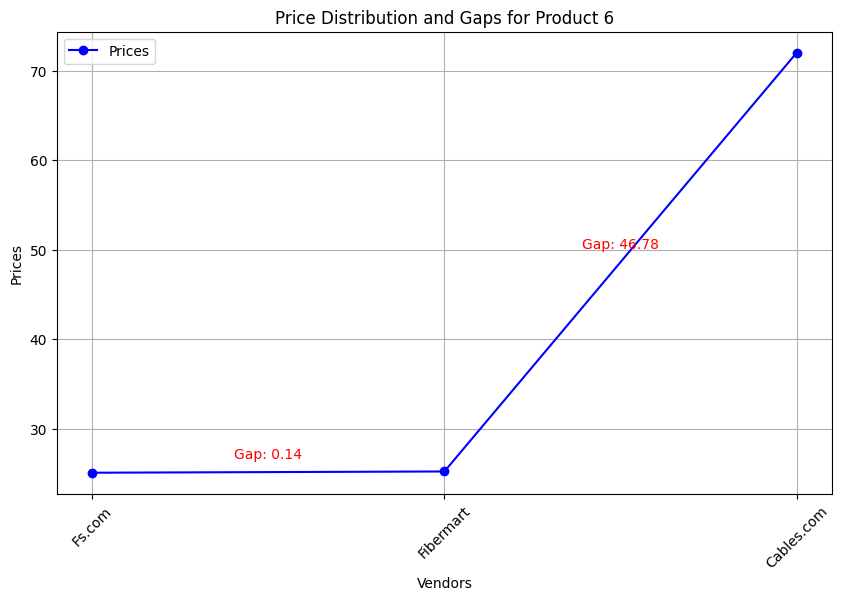

Gaps for Product 7: [1.7800000000000011 46.5]


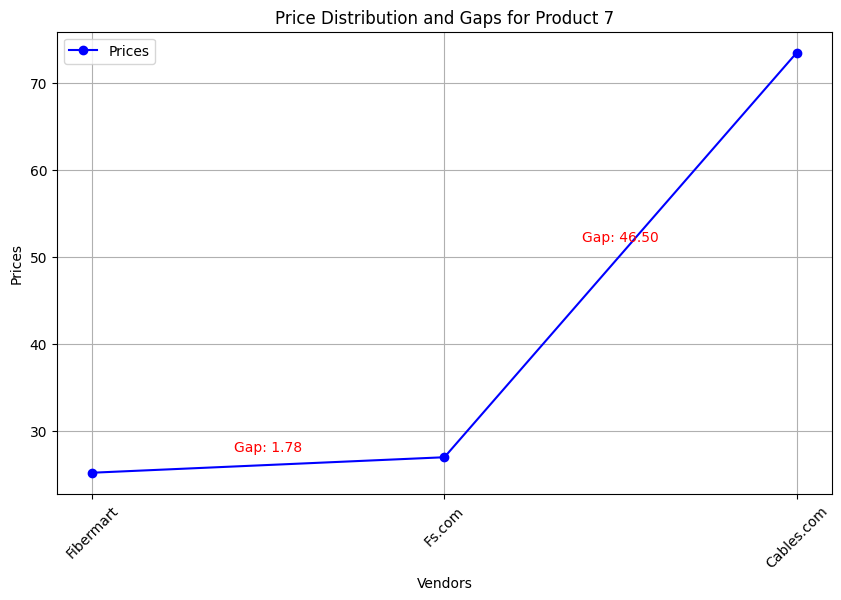

Gaps for Product 8: [0.3199999999999994 0.20000000000000018]


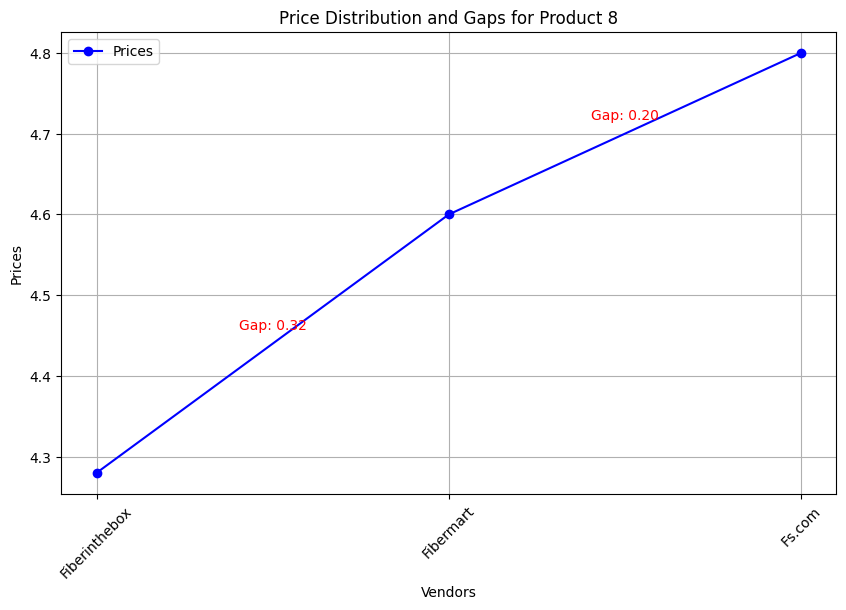

In [27]:
# Function to calculate price gaps and return sorted vendors with prices
def find_price_gaps_with_vendors(prices):
    valid_prices = prices.dropna()  # Remove NaN values
    sorted_prices = valid_prices.sort_values()  # Sort prices
    vendors = sorted_prices.index  # Get sorted vendor names
    gaps = sorted_prices.diff().dropna().values  # Calculate gaps
    return vendors, sorted_prices.values, gaps

# Finding and visualizing gaps for each product
for idx, row in df.iterrows():
    product = row["Fiber Optic Cables"]
    prices = row[1:]

    # Get sorted vendor names, prices, and gaps
    vendors, sorted_prices, gaps = find_price_gaps_with_vendors(prices)

    # Print the gaps
    print(f"Gaps for {product}: {gaps}")

    # Plot the price distribution and gaps
    plt.figure(figsize=(10, 6))
    plt.plot(vendors, sorted_prices, marker='o', linestyle='-', color='b', label='Prices')

    for i, gap in enumerate(gaps):
        plt.annotate(f'Gap: {gap:.2f}', (i + 0.5, (sorted_prices[i] + sorted_prices[i + 1]) / 2),
                     textcoords="offset points", xytext=(0, 10), ha='center', color='red')

    plt.title(f'Price Distribution and Gaps for {product}')
    plt.xlabel('Vendors')  # X-axis now shows vendor names
    plt.ylabel('Prices')
    plt.xticks(rotation=45)  # Rotate vendor names for better visibility
    plt.legend()
    plt.grid(True)
    plt.show()

Gaps for Product 1: [0.56 0.2599999999999998 0.2999999999999998 2.88]


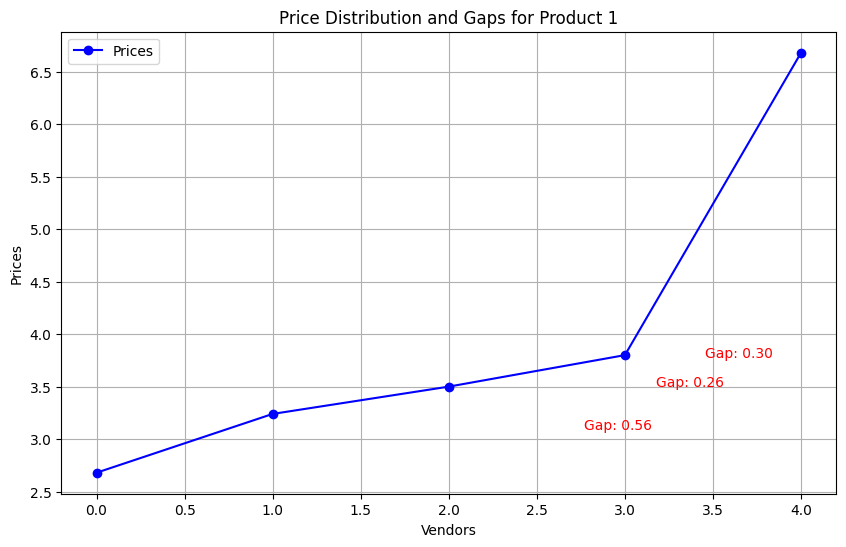

Gaps for Product 2: [54.30000000000001 68.69999999999999]


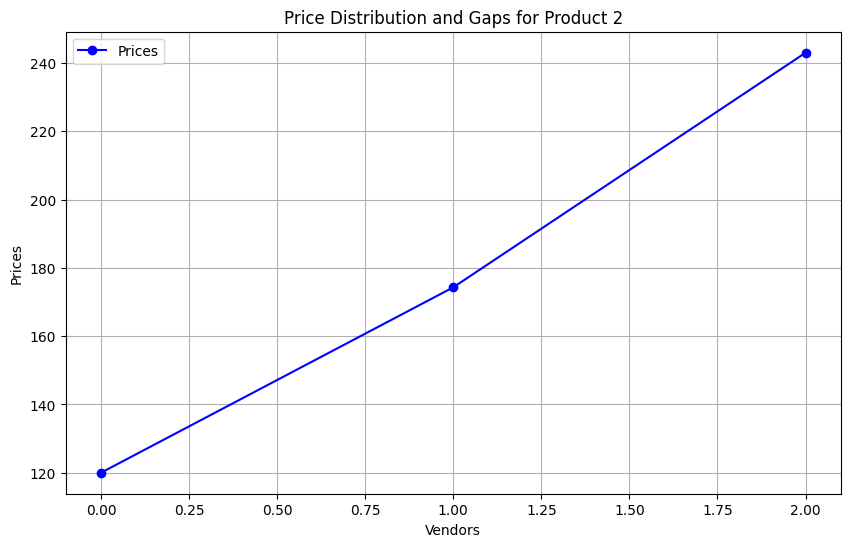

Gaps for Product 3: [0.45000000000000007 0.04999999999999993]


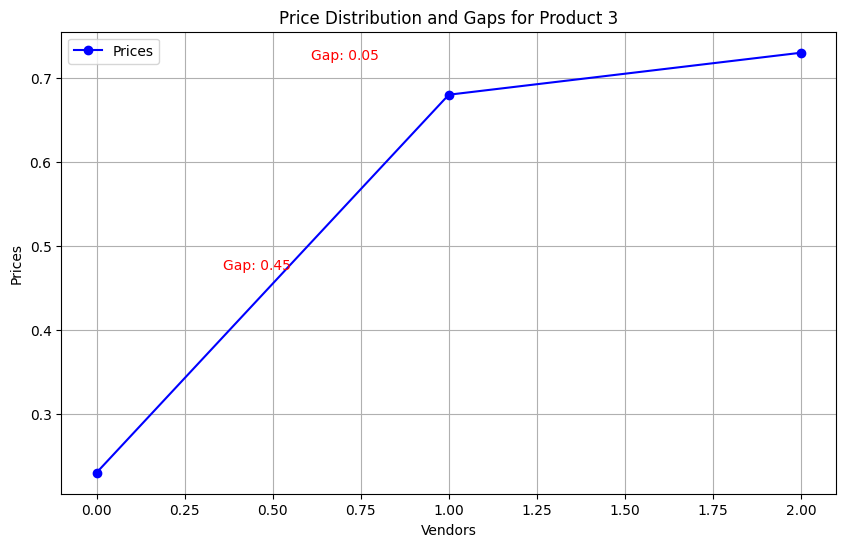

Gaps for Product 4: [3.0]


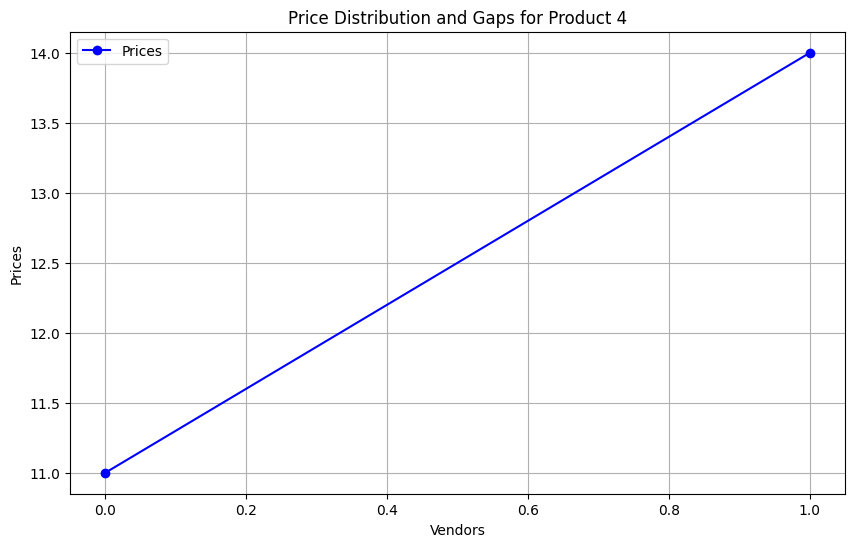

Gaps for Product 5: [0.72 0.3500000000000001]


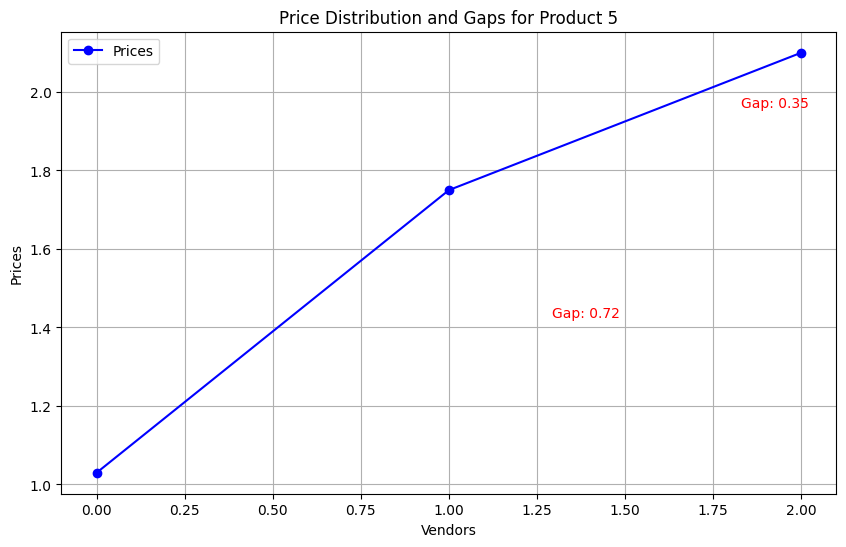

Gaps for Product 6: [0.14000000000000057 46.78]


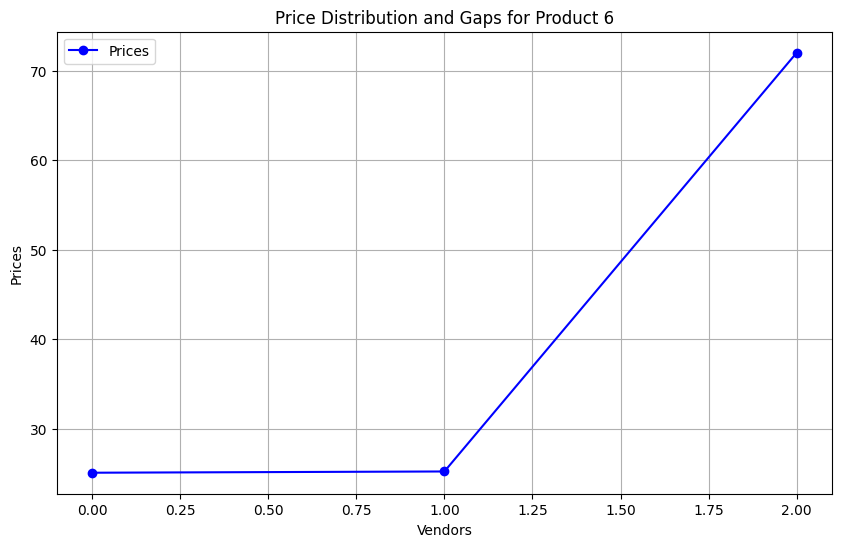

Gaps for Product 7: [1.7800000000000011 46.5]


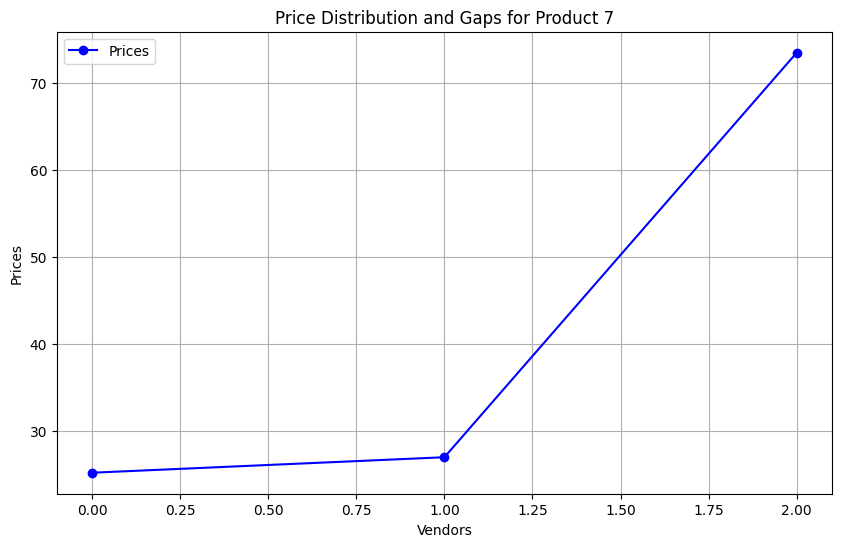

Gaps for Product 8: [0.3199999999999994 0.20000000000000018]


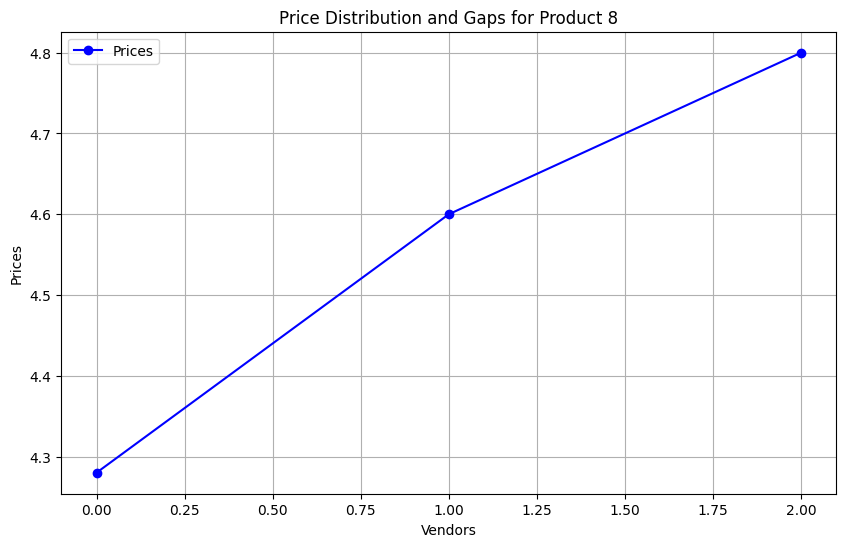

In [14]:
# Finding and visualizing gaps for each product
for idx, row in df.iterrows():
    product = row["Fiber Optic Cables"]
    prices = row[1:]
    gaps, sorted_prices = find_price_gaps(prices)

# Print the gaps
    print(f"Gaps for {product}: {gaps}")

# Plot the price distribution and gaps
    plt.figure(figsize=(10, 6))
    plt.plot(sorted_prices, marker='o', linestyle='-', color='b', label='Prices')

    for i, gap in enumerate(gaps):
        plt.annotate(f'Gap: {gap:.2f}', (sorted_prices[i] + gap / 2, (sorted_prices[i] + sorted_prices[i+1]) / 2),
                     textcoords="offset points", xytext=(0,10), ha='center', color='red')

    plt.title(f'Price Distribution and Gaps for {product}')
    plt.xlabel('Vendors')
    plt.ylabel('Prices')
    plt.legend()
    plt.grid(True)
    plt.show()

# **Summarize the Findings**

In [7]:
def find_price_extremes(row):
    valid_prices = row[1:].dropna()
    if not valid_prices.empty:
        valid_prices = valid_prices.astype(float)
        min_price = valid_prices.min()
        max_price = valid_prices.max()
        mean_price = valid_prices.mean()
        cheapest_vendor = valid_prices.idxmin()
        expensive_vendor = valid_prices.idxmax()
        return pd.Series([min_price, max_price, mean_price, cheapest_vendor, expensive_vendor])
    return pd.Series([np.nan, np.nan, np.nan, np.nan, np.nan])

price_extremes = df.apply(find_price_extremes, axis=1)
price_extremes.columns = ['Min Price', 'Max Price', 'Mean Price', 'Cheapest Vendor', 'Most Expensive Vendor']

print(price_extremes)



   Min Price  Max Price  Mean Price Cheapest Vendor Most Expensive Vendor
0       2.68       6.68    3.980000       Fibermart        CableWholesale
1     120.00     243.00  179.100000       Fibermart                Fs.com
2       0.23       0.73    0.546667       Fibermart                Fs.com
3      11.00      14.00   12.500000       Fibermart                Fs.com
4       1.03       2.10    1.626667       Fibermart            Cables.com
5      25.08      72.00   40.766667          Fs.com            Cables.com
6      25.22      73.50   41.906667       Fibermart            Cables.com
7       4.28       4.80    4.560000   Fiberinthebox                Fs.com
